In [25]:
import pandas as pd
import seaborn as sns
import sklearn

In [26]:
df=pd.read_csv('Churn_Modelling.csv')

In [27]:
df.shape

(10000, 14)

In [28]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [29]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
#input data
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
print(x)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  
0                  1        101348.88  
1                  1        112542.58  
2                  0       

In [31]:
#output data
y = df['Exited']
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


<AxesSubplot:xlabel='Exited', ylabel='count'>

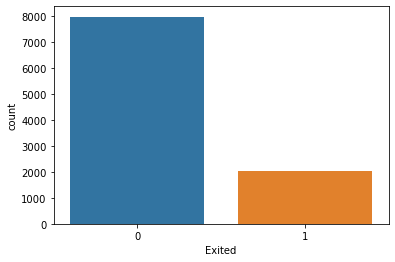

In [32]:
sns.countplot(x=y)

In [33]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
!pip install imbalanced-learn

In [35]:
from imblearn.over_sampling import RandomOverSampler


In [43]:
ros=RandomOverSampler(random_state=0)
x_over, y_over = ros.fit_resample(x, y)

In [44]:
y_over.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [51]:
x_std=scaler.fit_transform(x_over)
x_std

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x_std,y_over,random_state=0,test_size=0.25)

In [54]:
x.shape

(10000, 8)

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),
                 random_state=0,
                 max_iter=100,activation='relu')

In [57]:
ann.fit(xtrain,ytrain)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [58]:
ypred=ann.predict(xtest)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(ytest,ypred)

0.865143144148669

In [61]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

